In [ ]:
import pandas as pd

## 데이터 기초 정보 살펴보기

In [ ]:
file_path = "/content/drive/MyDrive/이것이데이터분석이다/ch1/chipotle.tsv.txt"
df = pd.read_csv(file_path, sep='\t')

In [ ]:
print(df.shape)
print('----------------------------------------')
print(df.info())

(4622, 5)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [ ]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
print(df.columns)
print('----------------------------------------')
print(df.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
----------------------------------------
RangeIndex(start=0, stop=4622, step=1)


## 데이터셋의 수치적 특징 파악하기

In [ ]:
# 'order_id' 문자형으로 바꿔주기
df['order_id'] = df['order_id'].astype(str)

In [ ]:
print(df.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [ ]:
print(len(df['order_id'].unique()))
print(len(df['item_name'].unique()))

1834
50


unique 함수로 범주형 피처의 개수 출력하기

### [가장 많이 주문한 아이템]

In [ ]:
item_count = df['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print('Top', idx, ':', val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [ ]:
print(item_count)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


In [ ]:
df['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

### [item 당 주문 개수와 총량 구하기]

In [ ]:
order_count = df.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [ ]:
item_quantity = df.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [ ]:
print(item_quantity.index)
print('---------------------------------------')
print(item_quantity.values)

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

### [시각화로 분석 결과 살펴보기]

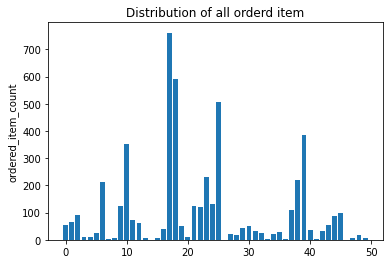

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

In [ ]:
print(df['item_name'].value_counts()[:10])

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


In [ ]:
print(df['item_name'].unique()[:10])

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']


## 데이터 전처리

In [ ]:
print(df.info())
print('----------------------------------------')
df['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
----------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [ ]:
# 'item_price' 칼럼을 $기호 제거와 float 자료형으로 변환하기
df['item_price'] = df['item_price'].apply(lambda x: float(x[1:]))
df.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [ ]:
df['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

## 탐색적 분석 : 스무고개로 분석하는 개념적 탐색

In [ ]:
df.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [ ]:
df.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

### [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기

In [ ]:
df_orderid_group = df.groupby('order_id').sum()
results = df_orderid_group[df_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [ ]:
print(df_orderid_group)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]


### [각 아이템의 가격 구하기]

In [ ]:
df_one_item = df[df.quantity == 1]
price_per_item = df_one_item.groupby('item_name').min()
price_per_item.sort_values(by = 'item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


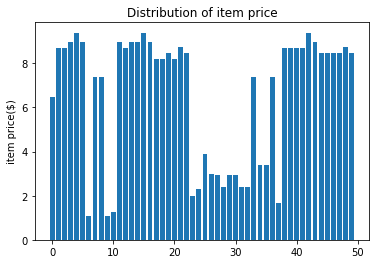

In [ ]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price,align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')

plt.show()

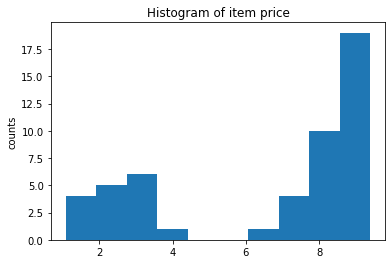

In [ ]:
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

### [가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기]

In [ ]:
df.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


### ['Veggi Salad Bowl'이 몇 번 주문되었는지 구하기]

In [ ]:
df_salad = df[df['item_name'] == 'Veggie Salad Bowl']
df_salad = df_salad.drop_duplicates(['item_name', 'order_id'])

print(len(df_salad))
df_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### ['Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기

In [ ]:
# “Chicken Bowl”을 2개 이상 주문한 주문 횟수를 구합니다.
df_chicken = df[df['item_name'] == "Chicken Bowl"]
df_chicken_result = df_chicken[df_chicken['quantity'] >= 2]
print(df_chicken_result.shape[0])

33


In [ ]:
df_chicken_result.shape

(33, 5)

In [ ]:
df_chicken_result.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
